# PyRadiomics toolbox in Python

In this notebook, we will load 2 brain datasets with segmentations of brain tumors.  The `radiomics` package will be used to extract a set of features, and the "signatures" will be compared.

For more detailed examples and links to source code, visit http://radiomics.io

In [1]:
# Radiomics package
from radiomics import featureextractor

import six, numpy as np

## Setting up data

Here we use `SimpleITK` (referenced as `sitk`, see http://www.simpleitk.org/ for details) to load two brain images and the corresponding segmentations as label maps.

In [2]:
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)


## Show the images

Using `matplotlib.pyplot` (referenced as `plt`), display the images in grayscale and labels in color.

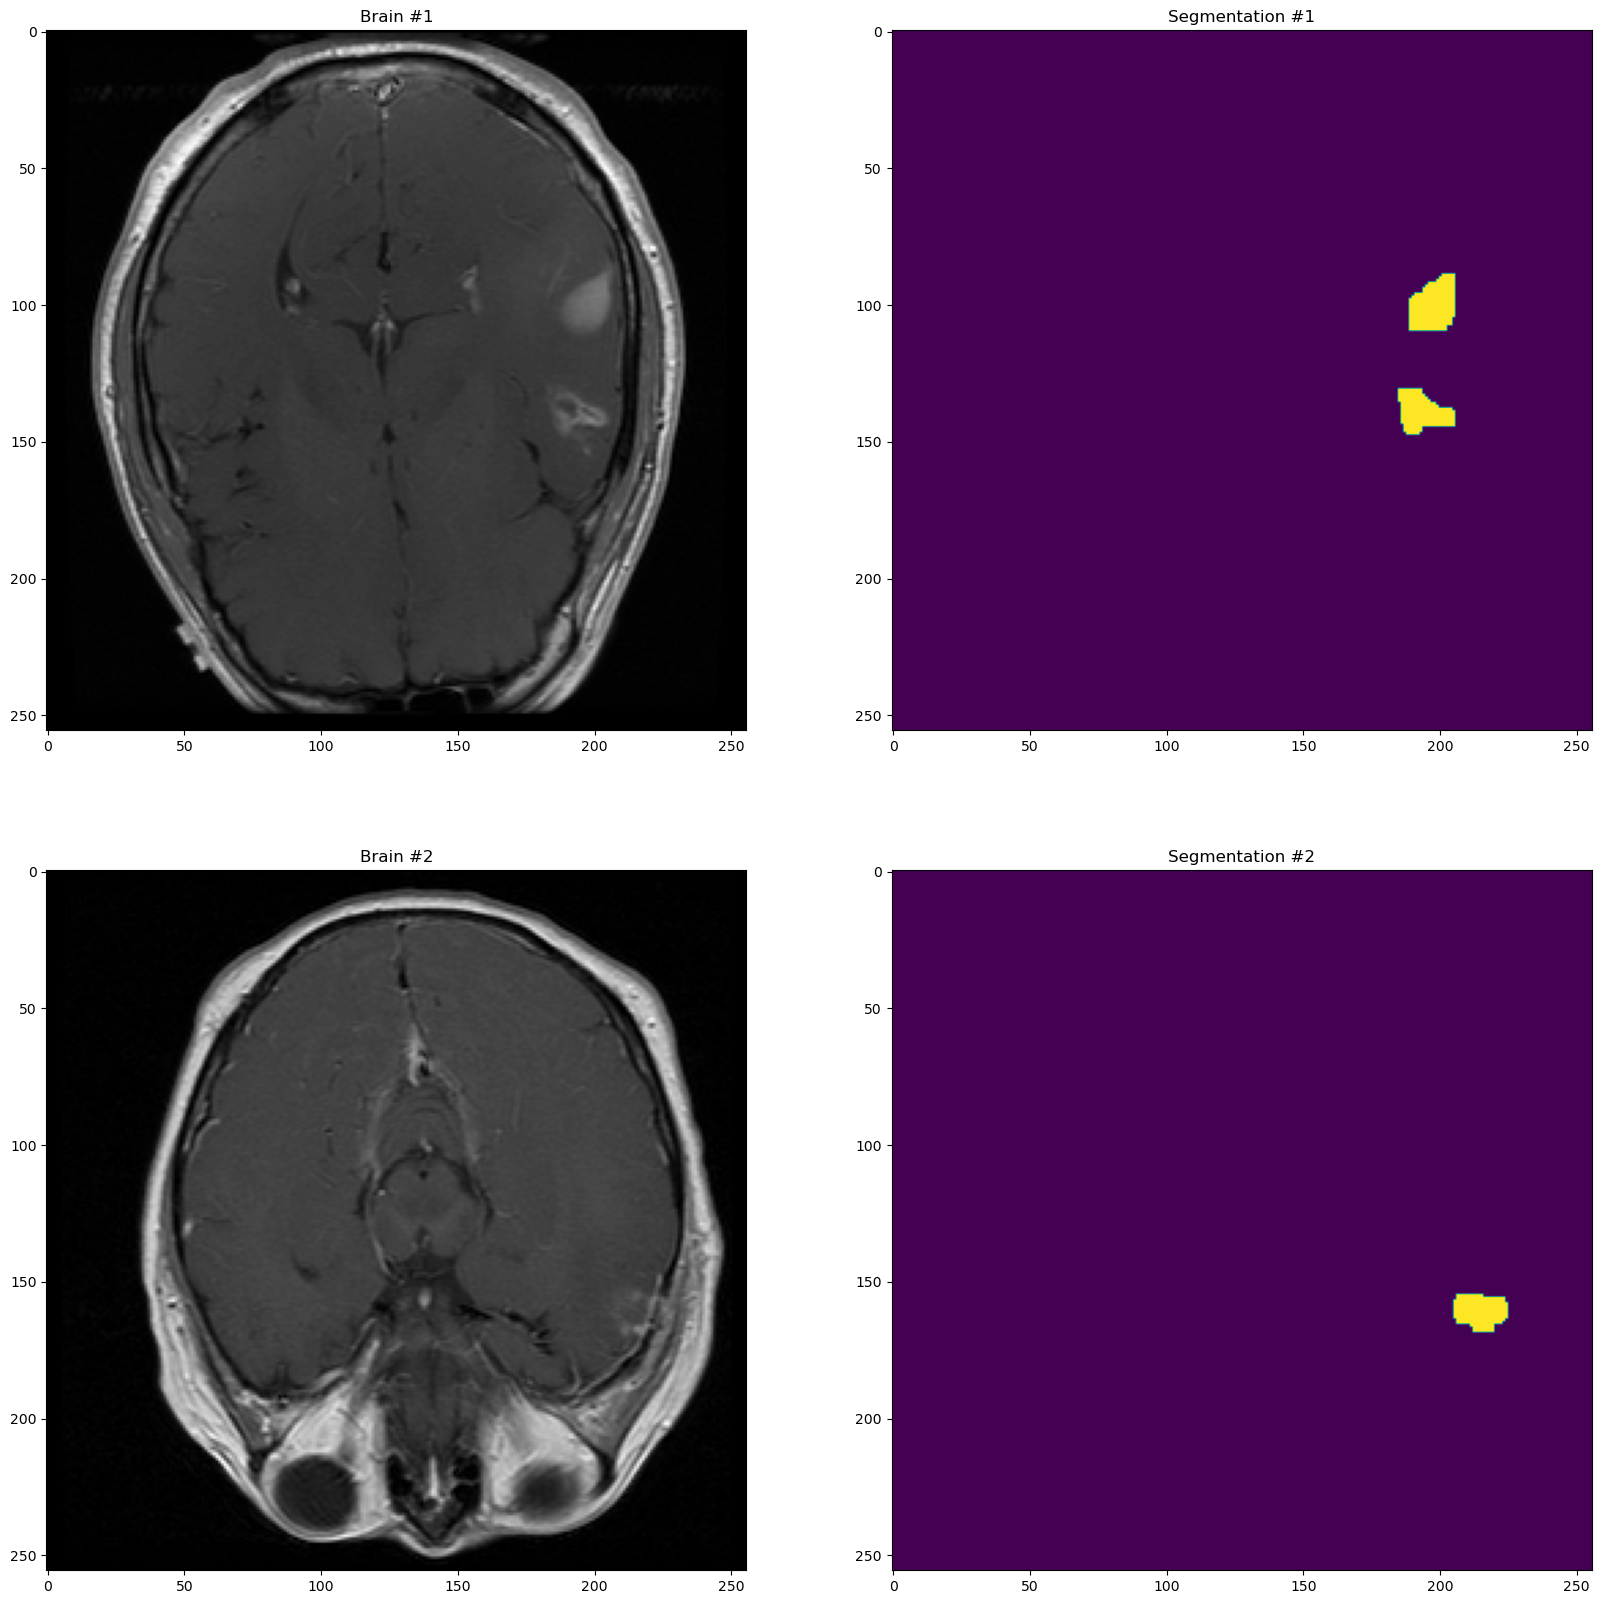

In [7]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[12,:,:])        
plt.title("Segmentation #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")        
plt.title("Brain #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[8,:,:])        
plt.title("Segmentation #2")

plt.show()

In [4]:
import os
os.getcwd()

'/home/peng/00_github/03_radiomics/240609_Radiomics-research-by-using-Python_SP/pyradiomics'

## Extract the features

Using the `radiomics` package, first construct an `extractor` object from the parameters set in `Params.yaml`.  Then generate features for the two images.

In [9]:
import os
# Instantiate the extractor
# params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

params = os.path.join(os.getcwd(), 'pyradiomics_params', 'MR_default.yaml')
extractor = featureextractor.RadiomicsFeatureExtractor(params)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

IndexError: arrays used as indices must be of integer (or boolean) type

## Prepare for plotting

Because we'd like to plot the feature vectors, create `numpy` arrays for features starting with `original_` (excluding meta-features).

In [ ]:
# Make an array of the values
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append ( feature_1, result_1[key])
        feature_2 = np.append ( feature_2, result_2[key])

## Plot

Plot the two feature vectors and the difference.  Feature values have a wide range of magnitudes and are plotted on a log scale.

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title ( "Features from brain #1")
        
plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title ( "Features from brain #1")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title ( "Difference")
plt.show()